In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 载入数据
data = np.genfromtxt('kmeans.txt',delimiter=' ')

In [3]:
# 设置k值
k = 4

In [4]:
model = KMeans(n_clusters=k)
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
centers = model.cluster_centers_
centers

array([[-2.46154315,  2.78737555],
       [-3.38237045, -2.9473363 ],
       [ 2.6265299 ,  3.10868015],
       [ 2.80293085, -2.7315146 ]])

In [6]:
predictions = model.predict(data)
predictions

array([2, 0, 3, 1, 2, 0, 3, 1, 2, 0, 3, 1, 2, 0, 3, 1, 2, 0, 3, 1, 2, 0, 3,
       1, 2, 0, 3, 1, 2, 0, 3, 1, 2, 0, 3, 1, 2, 0, 3, 1, 2, 0, 3, 1, 2, 0,
       3, 1, 2, 0, 3, 1, 2, 0, 3, 1, 2, 0, 3, 1, 2, 0, 3, 1, 2, 0, 3, 1, 2,
       0, 3, 1, 2, 0, 3, 1, 2, 0, 3, 1])

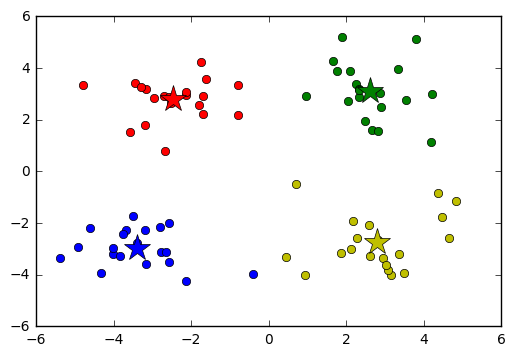

In [7]:
# 画样本点
mark = ['or','ob','og','oy']
for i,d in enumerate(data):
    plt.plot(d[0],d[1],mark[predictions[i]])
    
# 画分类中心点
mark = ['*r','*b','*g','*y']
for i,center in enumerate(centers):
    plt.plot(center[0],center[1],mark[i],markersize=20)

plt.show()

C:\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


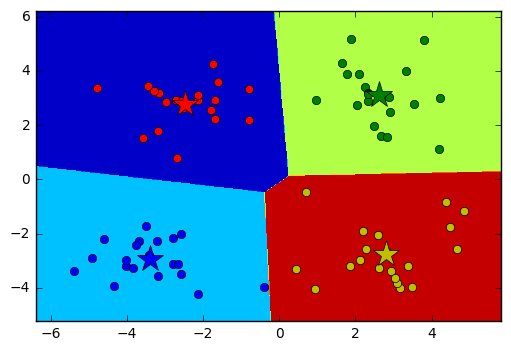

In [8]:
# 获取数据值所在的范围
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = model.predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)
# 等高线图
cs = plt.contourf(xx, yy, z)

# 画样本点
mark = ['or','ob','og','oy']
for i,d in enumerate(data):
    plt.plot(d[0],d[1],mark[predictions[i]])
    
# 画分类中心点
mark = ['*r','*b','*g','*y']
for i,center in enumerate(centers):
    plt.plot(center[0],center[1],mark[i],markersize=20)

plt.show()